In [2]:
import geopandas as gpd

## Terras Indigenas - Calculo de Area

"https://www.gov.br/funai/pt-br/atuacao/terras-indigenas/geoprocessamento-e-mapas"

<Axes: >

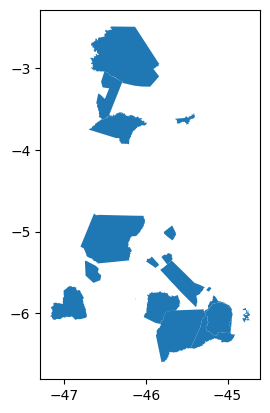

In [3]:
gdf_ti = gpd.read_file("/home/scosta/Insync/sergio.costa@ufma.br/Google Drive/Organizacao/Dados/vetoriais/limites/tis_poligonais.zip")
gdf_ti.plot()

In [4]:
gdf_prodes = gpd.read_file("/home/scosta/Insync/sergio.costa@ufma.br/Google Drive/Organizacao/Dados/vetoriais/desmatamento/prodes/cerrado/yearly_deforestarion_prodes_ma_cerrado.zip")
gdf_prodes.head()

KeyboardInterrupt: 

TI krikati

In [ ]:
gdf_ti.head()

,gid,terrai_cod,terrai_nom,etnia_nome,municipio_,uf_sigla,superficie,fase_ti,modalidade,reestudo_t,cr,faixa_fron,undadm_cod,undadm_nom,undadm_sig,dominio_un,data_atual,epsg,geometry
0,19,1501,Alto Turiaçu,Ka´apor,"Centro Novo do Maranhão,Maranhãozinho,Centro d...",MA,530524.7417,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL MARANHÃO,Não,3.020200e+10,COORDENACAO REGIONAL MARANHÃO,CR-MA,t,None,0,"POLYGON ((-46.61928 -2.66665, -46.61871 -2.665..."
1,38,3601,Arariboia,Guajá,"Arame,Buriticupu,Amarante do Maranhão,Bom Jesu...",MA,413288.0472,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL MARANHÃO,Não,3.020200e+10,COORDENACAO REGIONAL MARANHÃO,CR-MA,t,05/04/2023,0,"POLYGON ((-46.03316 -4.80712, -46.03316 -4.807..."
2,44,4801,Awa,Guajá,"Governador Newton Bello,Centro Novo do Maranhã...",MA,116582.9182,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL MARANHÃO,Não,3.020200e+10,COORDENACAO REGIONAL MARANHÃO,CR-MA,t,None,0,"POLYGON ((-46.50273 -3.38065, -46.49839 -3.369..."
3,45,4901,Bacurizinho,Guajá,Grajaú,MA,82432.4931,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL MARANHÃO,Não,3.020200e+10,COORDENACAO REGIONAL MARANHÃO,CR-MA,t,02/08/2018,0,"POLYGON ((-45.98152 -5.90594, -45.98200 -5.905..."
4,46,4902,Bacurizinho,Guajá,Grajaú,MA,134040.0000,Declarada,Tradicionalmente ocupada,Reestudo,COORDENACAO REGIONAL MARANHÃO,Não,3.020200e+10,COORDENACAO REGIONAL MARANHÃO,CR-MA,f,03/08/2018,0,"POLYGON ((-45.98152 -5.90594, -45.98200 -5.905..."


<Axes: >

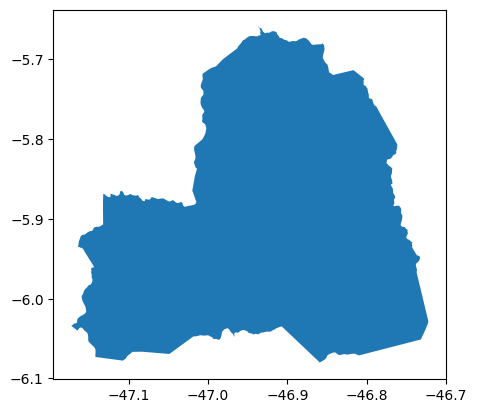

In [ ]:
krikati = gdf_ti[gdf_ti["terrai_nom"] == "Krikati"]
krikati.plot()

In [ ]:
print(gdf_prodes.crs)
print(krikati.crs)

EPSG:4674
GEOGCS["SIRGAS 2000",DATUM["Sistema_de_Referencia_Geocentrico_para_las_AmericaS_2000",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6674"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


In [ ]:
crs_projetado = 'EPSG:31983'

In [ ]:
krikati = krikati.to_crs(crs_projetado)
gdf_prodes = gdf_prodes.to_crs(crs_projetado)

<Axes: >

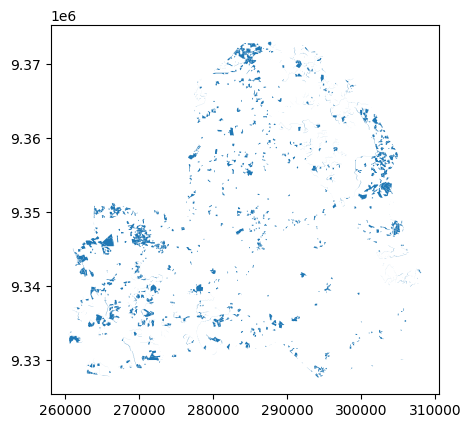

In [ ]:
roi_prodes = gpd.overlay(gdf_prodes, krikati, how='intersection')
roi_prodes.plot()

In [ ]:
roi_prodes['area_km2'] = roi_prodes.geometry.area / 1000000  # Convertendo metros quadrados para quilômetros quadrados

In [ ]:
df_grp_roi = roi_prodes.groupby(["year"])["area_km2"].sum().reset_index()
df_grp_roi

,year,area_km2
0,2002.0,21.185950
1,2004.0,7.288974
2,2006.0,6.248258
3,2008.0,11.262593
4,2010.0,4.256597
5,2012.0,3.193470
6,2013.0,1.272819
7,2014.0,0.963624
8,2015.0,3.086294
9,2016.0,0.586188


In [ ]:
df_grp_roi.sum()

year        34240.000000
area_km2       80.259682
dtype: float64